# Upper Confidence Bound

## Rules: Specify $n$ arms with one is potentially the best arm, which has 90% chance yielding a reward of 1, where the chance is 10% for rest of the arms.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
class UCB:
    def __init__(self,c,n_arms,best_arm = 0):
        self.c = c
        self.n_arms = n_arms
        self.Q = np.array([1.0/n_arms] * n_arms) #action value
        self.R = np.array([0.0] * n_arms) #reward
        self.N = np.array([0] * n_arms) #selected occurence
        self.best_arm = best_arm # a default best arm
    
    def get_reward(self,action):
        
        # when the best arm is pulled, there are 90% of chance having a positive reward
        # otherwise only 10% of chance
        if action == self.best_arm:
            return np.random.choice([0.1,1],1,p = [0.1,0.9])[0]
        else:
            return np.random.choice([0.1,1],1,p = [0.9,0.1])[0]
        
    def get_action(self,t):
        
        ## argmax(a): Q(a) + c*ln(t)/Na(t)
        
        confidence_bound = self.c*np.sqrt(np.log(t)/self.N)
        return np.argmax(self.Q+confidence_bound)

        
    def step(self,t):
        action = self.get_action(t)
        reward = self.get_reward(action)
        #update reward
        self.R[action]+=reward
        
        #update N
        self.N[action]+=1

        #update Q
        self.Q[action] = self.R[action]/self.N[action]
        
        return reward
        
    def simulation(self,num_steps):
        total_reward = 0
        avg_reward = []
        for i in range(1,num_steps+1):
            reward = self.step(i)
            total_reward += reward
            avg_reward.append(total_reward/i)
            
        return avg_reward

In [66]:
test = UCB(2,10,best_arm = 5)
avg_reward = test.simulation(10000)

/var/folders/th/flmj2p9x5s12x8nk19d3zbwr0000gn/T/ipykernel_99693/3533867949.py:24: RuntimeWarning: invalid value encountered in true_divide
  confidence_bound = self.c*np.sqrt(np.log(t)/self.N)
/var/folders/th/flmj2p9x5s12x8nk19d3zbwr0000gn/T/ipykernel_99693/3533867949.py:24: RuntimeWarning: divide by zero encountered in true_divide
  confidence_bound = self.c*np.sqrt(np.log(t)/self.N)


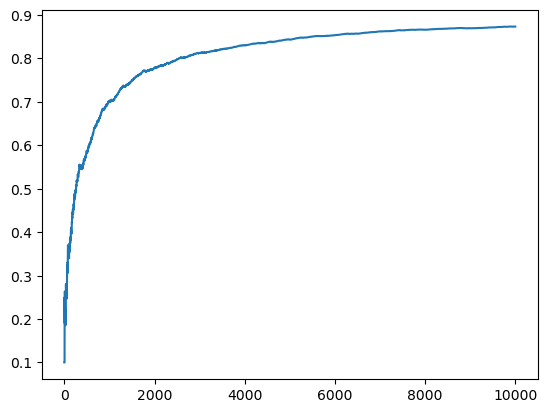

In [67]:
plt.plot(avg_reward)

In [68]:
test.N

array([  57,   60,   59,   55,   62, 9478,   53,   59,   60,   57])